In [1]:
import pypevoc.speech as sp
#import scikits.talkbox as tbox
import scipy.signal as sig

In [2]:
a_req = [-0.5,0.25,-.5,.6]
#a_req = [-0.5,0.25]

In [3]:
def lpc_predict(y_prev,a):
    yy=0
    for ii, aa in enumerate(a):
        yy += -aa*y_prev[-ii]
    return yy


In [34]:
n_samp = 1000

x = np.random.randn(n_samp)

#y = np.zeros(len(x)-len(a_req)-1)
y = [0] * len(a_req)
for xx in x:
    yy = xx
    for ii, aa in enumerate(a_req):
        yy += -aa*y[-ii-1]
    y.append(yy)
#y = sig.lfilter([1],np.concatenate(([1],a_req)),x)
#y = y[np.isfinite(y)]

y = np.array(y)

In [32]:
nv=10
print(y[:nv])
print(y1[:nv])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[ 0.          0.          0.          0.          0.29085031 -0.411343
  0.24742129  0.73979298  0.58328048  1.0189684 ]


In [9]:
a_lpc = sp.analysis.lpc(np.array(y), order=len(a_req))
print(a_lpc)

[-0.51742703  0.25927647 -0.53152065  0.61196432]


In [10]:
np.roots(np.concatenate([[1],a_lpc]))


array([-0.45713505+0.79294859j, -0.45713505-0.79294859j,
        0.71584856+0.46696386j,  0.71584856-0.46696386j])

In [11]:
#a_tbox = sp.analysis.Formants(x, Fs=44100, fMax=44100)

<IPython.core.display.Javascript object>


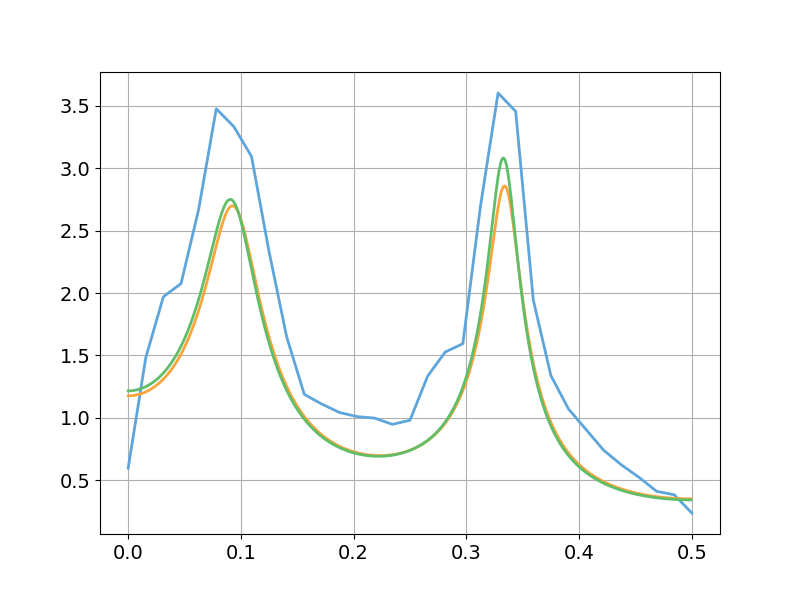

In [12]:
%matplotlib notebook
%matplotlib notebook
%matplotlib notebook
pl.figure()
f,h = sig.welch(y,nperseg=64)
pl.plot(f,np.sqrt(h))
w,h = sig.freqz(1,np.concatenate([[1],np.array(a_req)]))
pl.plot(w/np.pi/2,np.abs(h))
w,h = sig.freqz(1,np.concatenate([[1],a_lpc]))
pl.plot(w/np.pi/2,np.abs(h))

In [13]:
sp.analysis.Formants(np.array(y),Fs=1,fMax=.5,fMin=0.0001,modelOrd=4,tWind=50,tHop=20)


(array([ 25.,  45.,  65.,  85., 105., 125., 145., 165., 185., 205., 225.,
        245., 265., 285., 305., 325., 345., 365., 385., 405., 425., 445.,
        465., 485., 505., 525., 545., 565., 585., 605., 625., 645., 665.,
        685., 705., 725., 745., 765., 785., 805., 825., 845., 865., 885.,
        905., 925., 945.]), array([[0.1573059 , 0.34462341],
        [0.16470637, 0.33160074],
        [0.12973277, 0.31748837],
        [0.12045151, 0.34210537],
        [0.16249676, 0.35465582],
        [0.12360161, 0.33024142],
        [0.11723255, 0.35031478],
        [0.12180417, 0.33388966],
        [0.12474897, 0.33775942],
        [0.14831729, 0.34328855],
        [0.16781492, 0.33587209],
        [0.16905778, 0.36092397],
        [0.07920076, 0.33015793],
        [0.12937479, 0.33731579],
        [0.100255  , 0.36119532],
        [0.14535585, 0.33546678],
        [0.14946381, 0.3258659 ],
        [0.18866792, 0.34370481],
        [0.16742946, 0.33841604],
        [0.0534904 , 0.34465146

In [20]:
%pdb off
lpc_ord = len(a_lpc)

ypred = np.zeros(len(y))

for ii, yy in enumerate(y[:-lpc_ord]):
    ypred[ii+lpc_ord] = lpc_predict(y[ii:ii+lpc_ord],a_lpc)

Automatic pdb calling has been turned OFF


In [36]:
np.std(y[lpc_ord:-1] - ypred[lpc_ord+1:])

1.5478653086018022

In [37]:
np.std(y)

1.300611396674454

In [38]:
np.std(x)

0.9364202407703583

<IPython.core.display.Javascript object>


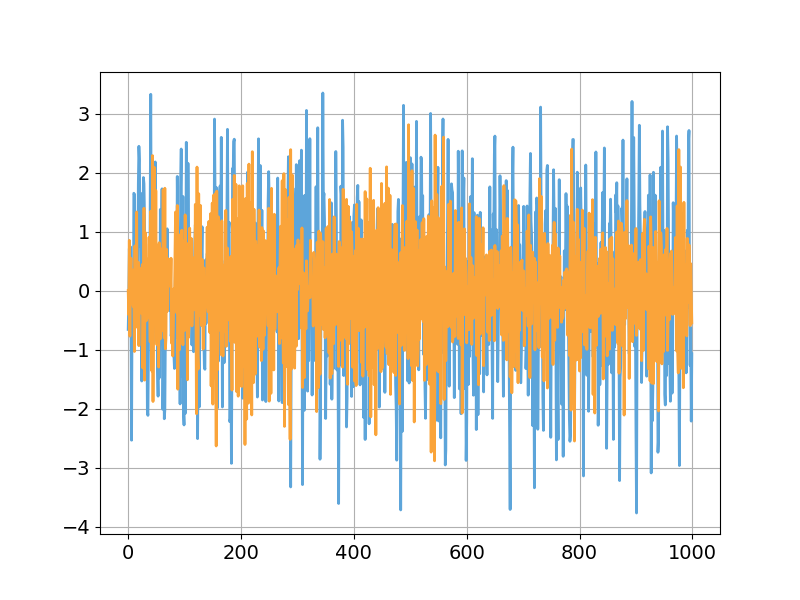

In [40]:
pl.figure()
pl.plot(y[lpc_ord:])
pl.plot(ypred[lpc_ord:])